Avaliação - Unidade 02
===

Identificação dos alunos (nome completo): 

- Este trabalho irá compor 40% da segunda unidade.
- Grupo de até dois alunos.
- Os alunos deverão enviar (apenas um por grupo) através do Sigaa, o notebook e os datasets gerados na avaliação em um arquivo compactado (.zip). 
- Todas as respostas devem ser realizadas através de código python e os resultados explicados em estilo markdown
- As informações (datasets) necessárias para resolução dos problemas podem ser encontradas em http://dados.ufrn.br/group/ensino


\# 1. (1 ponto) Quantas e quais disciplinas com código IMD foram consolidadas em 2017.1? 
**Dica:** 
>```python
df[df['A'].str.contains("hello")]
```

In [24]:
import pandas as pd
import numpy as np
np.seterr(divide="ignore", invalid="ignore")

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
turmas_total = pd.read_csv('turmas-2017.1.csv', sep=";")

turmas_imd  = turmas_total[turmas_total['codigo'].str.contains("IMD")]

turmas_consolidadas = turmas_imd[turmas_imd["situacao_turma"].str.contains("CONSOLIDADA")]

print("Turmas consolidadas:",turmas_consolidadas.shape[0])
turmas_consolidadas.pivot_table(index="nome_ascii", values="situacao_turma", aggfunc='count')

Turmas consolidadas: 103


,situacao_turma
nome_ascii,
ADMINISTRACAO DE SISTEMAS OPERACIONAIS PARA REDES,1
ANALISE ESTATISTICA PARA BIG DATA,1
APRENDIZAGEM DE MAQUINA PARA BIG DATA,1
ARMAZENAMENTO DE BIG DATA,1
AVALIACAO DA INTERACAO HUMANO-COMPUTADOR,1
CALCULO DIFERENCIAL E INTEGRAL I,3
DESENVOLVIMENTO DE PROJETOS DE REDES DE COMPUTADORES,1
DESENVOLVIMENTO DE SISTEMAS WEB II,1
DESIGN DA INTERACAO HUMANO-COMPUTADOR,1


\# 2. (3 pontos) Realize um estudo envolvendo as propriedades de **assimétria** e **curtose** para as turmas IMD0033 (probabilidade) consolidadas em 2017.1. Utilize gráficos e explique os resultados. Reforce também os horários das disciplinas nos resultados. 

In [3]:
turmas_prob = turmas_imd[turmas_imd["codigo"].str.contains("IMD0033")]


codigo_turma = list(turmas_prob['id_turma'])

In [4]:
alunos_total = pd.read_csv('matricula-componente-20171.csv', sep=";")

In [5]:
alunos_prob1 = alunos_total[alunos_total["id_turma"] == codigo_turma[0]]
alunos_prob1 = alunos_prob1.dropna()
alunos_prob2 = alunos_total[alunos_total["id_turma"] == codigo_turma[1]]
alunos_prob2 = alunos_prob2.dropna()

In [6]:
# We can test how skewed a distribution is using the skew function.
# A positive value means positive skew, 
# a negative value means negative skew, and close to zero means no skew.
from scipy.stats import skew

skewness_turma_a = skew(alunos_prob1['nota'].value_counts())
skewness_turma_b = skew(alunos_prob2['nota'].value_counts())

In [7]:
from scipy.stats import kurtosis

kurtosiness_turma_a = kurtosis(alunos_prob1['nota'].value_counts())
kurtosiness_turma_b = kurtosis(alunos_prob2['nota'].value_counts())

In [8]:
# seaborn is commonly imported as `sns`.
import matplotlib.pyplot as plt
import seaborn as sns

#to switch to seaborn defaults, simply call the set() function.
sns.set()

# The four preset contexts, in order of relative size, are paper, notebook, talk, and poster
sns.set_context("notebook")

A simetria da turma 57597912 é 4.392894113344194
A simetria da turma 57597913 é 3.9785262183599515
A curtose da turma 57597912 é 21.38177433896744
A curtose da turma 57597913 é 17.362042170356005


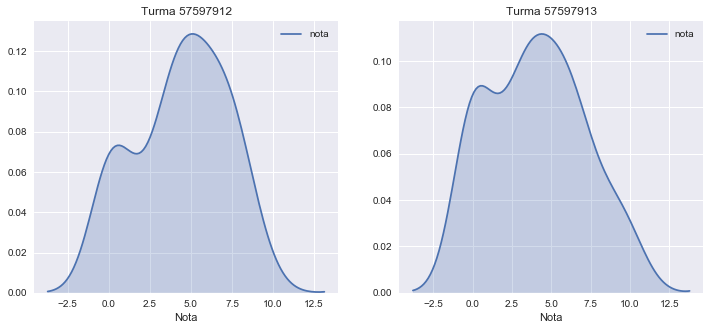

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))

sns.set_style("white")
sns.kdeplot(alunos_prob1["nota"], shade=True, ax=axes[0])
sns.kdeplot(alunos_prob2["nota"], shade=True, ax=axes[1])
axes[0].set_xlabel('Nota')
axes[1].set_xlabel("Nota")

sns.despine(left=True, bottom=True)
axes[0].set_title("Turma "+str(codigo_turma[0]))
axes[1].set_title("Turma "+str(codigo_turma[1]))

print("A simetria da turma", codigo_turma[0],"é", skewness_turma_a)
print("A simetria da turma", codigo_turma[1],"é", skewness_turma_b)
print("A curtose da turma", codigo_turma[0],"é", kurtosiness_turma_a)
print("A curtose da turma", codigo_turma[1],"é", kurtosiness_turma_b)

plt.show()

\# 3. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos que descrevam as distribuições estatísticas (utilizar as funções **facetgrid** e **map**) de todas as turmas IMD0030 (Linguagem de Programação I) consolidas em 2017.1. Na análise, assuma como referência as médias finais e a situação dos alunos. 

C:\Users\IMD\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


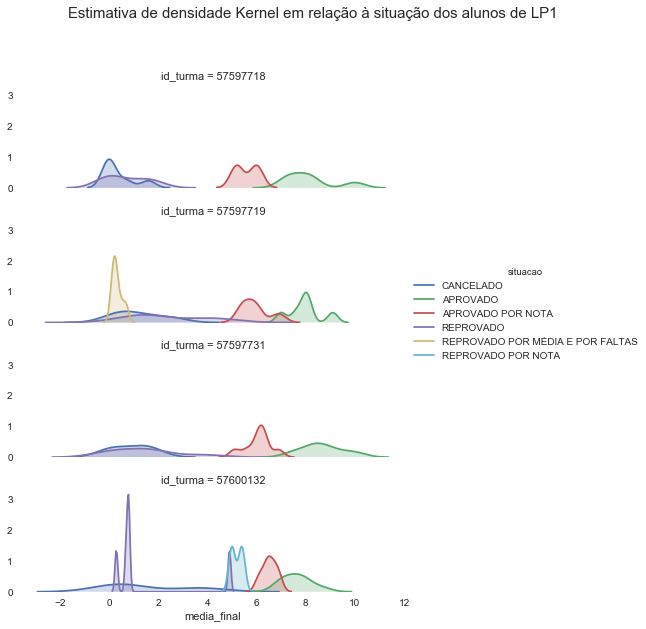

In [66]:
turmas_lp1 = turmas_imd[turmas_imd["codigo"].str.contains("IMD0030")]

codigo_lp1 = list(turmas_lp1['id_turma'].unique())

lista_alunos_lp1 = pd.DataFrame

lista_alunos_lp1 = alunos_total.loc[alunos_total["id_turma"].isin(codigo_lp1)].dropna()

lista_alunos_lp1 = lista_alunos_lp1.drop_duplicates(subset = "id_discente", keep="first").dropna()

# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(lista_alunos_lp1, row="id_turma", hue="situacao", size=2, aspect=3)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "media_final", shade=True)

g.add_legend()

sns.despine(left=True, bottom=True)

plt.suptitle("Estimativa de densidade Kernel em relação à situação dos alunos de LP1", 
             fontsize=15,
            y = 1.09)

plt.show()

\# 4. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos de histograma referente as médias finais de todas as turmas IMD0029 (Estrutura de dados I) consolidadas em 2017.1. Incremente nos gráficos linhas que descrevam a média e mediana da distribuição. 

Os valores para a turma 57597598 são:
Média: 3.5461538461538464
Mediana: 2.5


Os valores para a turma 57597708 são:
Média: 6.014705882352939
Mediana: 6.15


Os valores para a turma 57597710 são:
Média: 3.573913043478261
Mediana: 4.0


Os valores para a turma 57600131 são:
Média: 2.141666666666666
Mediana: 0.45




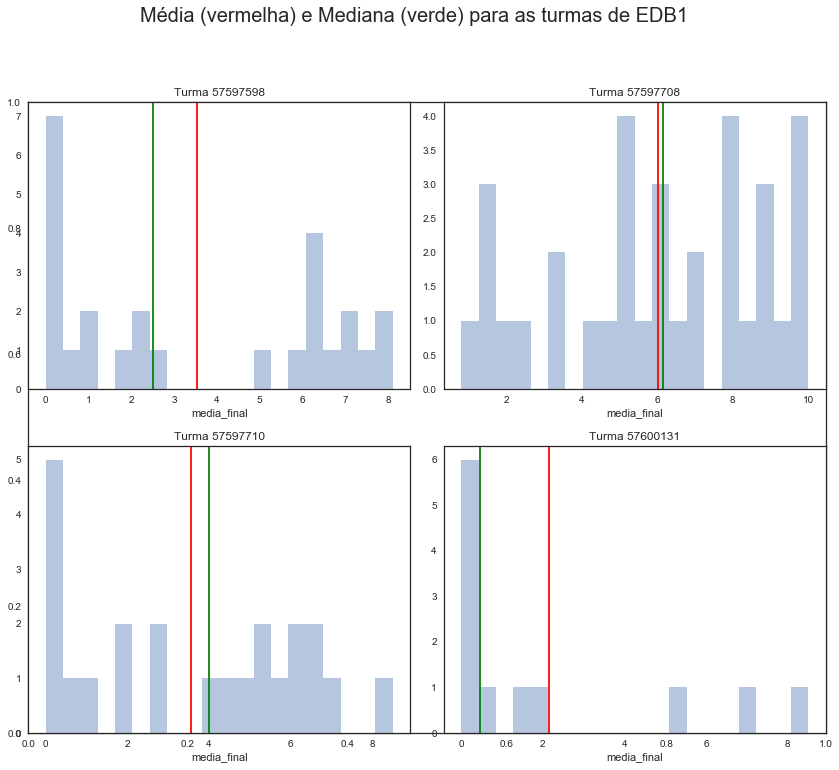

In [63]:
fig = plt.subplots(figsize=(12,10))

turmas_edb1 = turmas_imd[turmas_imd["codigo"].str.contains("IMD0029")]

codigo_edb1 = list(turmas_edb1['id_turma'].unique())

lista_turmas_edb1 = []

for codigo in codigo_edb1:
    alunos_edb1 = alunos_total.loc[alunos_total["id_turma"] == codigo].dropna()
    alunos_edb1 = alunos_edb1.drop_duplicates(subset = "id_discente", keep="first").dropna()
    lista_turmas_edb1.append(alunos_edb1)

    
# main title
plt.suptitle("Média (vermelha) e Mediana (verde) para as turmas de EDB1", 
             fontsize=20,
            y = 1.09)

for i in range(len(codigo_edb1)):
    axe = fig[0].add_subplot(2,2,i+1)
    sns.distplot(lista_turmas_edb1[i]['media_final'], kde = False, ax=axe,bins=20)
    axe.axvline(lista_turmas_edb1[i]['media_final'].mean(), color="r")
    axe.axvline(lista_turmas_edb1[i]['media_final'].median(), color="g")
    axe.set_title("Turma " + str(codigo_edb1[i]))
    print('Os valores para a turma', codigo_edb1[i], 'são:')
    print('Média:',lista_turmas_edb1[i]['media_final'].mean())
    print('Mediana:',lista_turmas_edb1[i]['media_final'].median())
    print('\n')


plt.tight_layout()
plt.show()